## Initializing session

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


common_settings = {
                   # LambdaCDM parameters
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}


import os 
path_to_class_sz = os.environ['PATH_TO_CLASS_SZ_DATA']

In [19]:
cosmology = {
     'h' : 0.6774,
     'Omega_b' : 0.04860,
     'Omega_cdm' : 0.315-0.04860,
     'sigma8' : 0.8159,
     'n_s' : 0.9667,

}

fast_cosmology = {
'H0': cosmology['h']*100.,
'omega_b': cosmology['Omega_b']*cosmology['h']**2,
'omega_cdm': cosmology['Omega_cdm']*cosmology['h']**2,
# 'sigma8': 0.831,
'ln10^{10}A_s': 3.024551967771024,
'n_s': cosmology['n_s'],
'tau_reio' : 0.055,

}

## Galaxy kernels

0.9999999999999999
1.0000000000000002


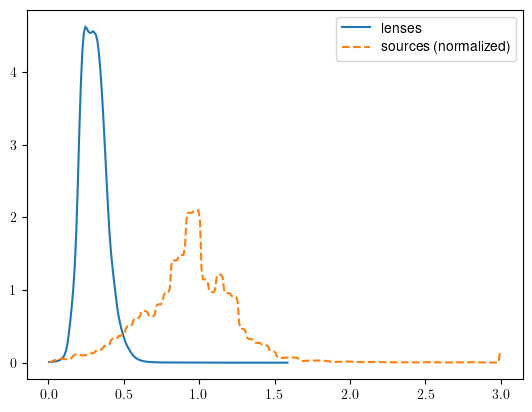

In [11]:
z , nz_lenses = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_lens_bin1.txt',unpack=True)
plt.plot(z,nz_lenses,label='lenses')
print(np.trapz(nz_lenses,z))
z , nz_sources = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_source_normalized_bin4.txt',unpack=True)
plt.plot(z,nz_sources,label='sources (normalized)',ls='--')

print(np.trapz(nz_sources,z))
plt.legend()

## Compute

In [20]:
%%time

M = Class()
# M.set(cosmology)
M.set(fast_cosmology)
M.set({
'output':'gamma_gal_gallens_1h,gamma_gal_gallens_2h',
'ell_max' : 5e5,
'ell_min' : 2,
'dlogell':0.1,
    
'ndim_masses': 80,
'ndim_redshifts':80,
    
'mass_function':'T08M200c',


'M_min':1e11, # Msun/h
'M_max':1e15, # Msun/h
'mass_epsrel': 1e-3,
'mass_epsabs': 1e-40,
    
'z_min':1e-5, 
'z_max': 2.,
'redshift_epsrel': 0.5e-3,
'redshift_epsabs': 1e-40,

'delta_for_galaxies':'200c',
'delta_for_matter_density':'200c',
    
'concentration_parameter':'fixed',
    
'M0_HOD': 0.,
'M_min_HOD':10.**11.57, #Msun/h
'M1_prime_HOD':10.**12.75, #Msun/h
    
'sigma_log10M_HOD':0.17,
'alpha_s_HOD':0.99,
    
'x_out_truncated_nfw_profile_satellite_galaxies':1., # so corresponds to 1xr200c
    
'csat_over_cdm' : 1.,

'f_cen_HOD': 1.,
'Delta_z_lens':0.00,
'Delta_z_source':0.00,
    
'galaxy_sample' : 'custom',
'full_path_to_dndz_gal' : path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_lens_bin1.txt', # lens galaxies
'full_path_to_source_dndz_gal' : path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_source_normalized_bin4.txt', # source galaxies

'N_samp_fftw':1024, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-8,
'l_max_samp_fftw' : 1e8,
    
'hm_consistency' : 1,
# 'ndim_redshifts': 200,
# 'ndim_masses': 500,
    
'use_pknl_in_2hterms': 0,

    
# 'P_k_max_h/Mpc':5e1,
# 'non_linear':'halofit',

'do_real_space_with_mcfit': 1,
})
M.compute_class_szfast()

CPU times: user 11.1 s, sys: 2.04 s, total: 13.1 s
Wall time: 1.62 s


In [21]:
gamma_t_thetas = np.asarray(M.gamma_ggamma()['thetas'])
gamma_t_1h = np.asarray(M.gamma_ggamma()['1h'])
gamma_t_2h = np.asarray(M.gamma_ggamma()['2h'])
m_gammat = 0. 

cl_g_gamma_ell = np.asarray(M.cl_ggamma()['ell'])
cl_g_gamma_1h = np.asarray(M.cl_ggamma()['1h'])
cl_g_gamma_2h = np.asarray(M.cl_ggamma()['2h'])

m_gammat = 0.

In [22]:
thmcfitcsz,ximcfitcsz = M.cl_ggamma()['theta'],M.cl_ggamma()['xi']

## Plot

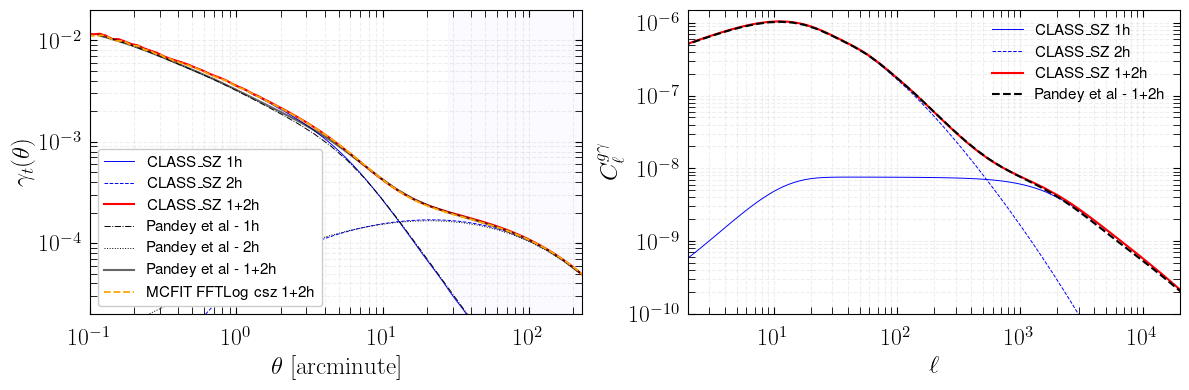

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x128eb6580>


In [26]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\theta$ $\mathrm{[arcminute]}$',size=title_size)
ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(2e-5,2e-2)
ax.set_xlim(1e-1,2.3e2)
ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_1h,label='CLASS_SZ 1h',c='b',ls='-',lw=0.7)
ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_2h,label='CLASS_SZ 2h',c='b',ls='--',lw=0.7)
ax.plot(gamma_t_thetas,(1.+m_gammat)*(gamma_t_2h+gamma_t_1h),label='CLASS_SZ 1+2h',c='r')


th_z21, gammat_z21_1h, gammat_z21_2h, gammat_z21_tot  = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/gammat_bin14_v3.txt',unpack=True)
ax.plot(th_z21,gammat_z21_1h,label='Pandey et al - 1h',c='k',ls='-.',lw=0.7)
ax.plot(th_z21,gammat_z21_2h,label='Pandey et al - 2h',c='k',ls=':',lw=0.7)
ax.plot(th_z21,gammat_z21_tot,label='Pandey et al - 1+2h',c='k',ls='-',alpha=0.6)

# ax.plot(theta,G/2./np.pi,label='MCFIT FFTLog 1+2h',ls='-.')
ax.plot(thmcfitcsz,ximcfitcsz,label='MCFIT FFTLog csz 1+2h',ls='--',lw=1.3,c='orange')
# ax.plot(theta,G2h/2./np.pi,label='MCFIT FFTLog 2h',ls='--')

ax.axvspan(28,2.3e2,alpha=0.02,color='b')

ax.legend(loc=3,ncol = 1,frameon=True,framealpha=1,fontsize=11)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{g\gamma}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-10,1.5e-6)
ax.set_xlim(2.,2e4)
fac = cl_g_gamma_ell*(cl_g_gamma_ell+1.)/2./np.pi
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac,label='CLASS_SZ 1h',c='b',ls='-',lw=0.7)
ax.plot(cl_g_gamma_ell,cl_g_gamma_2h/fac,label='CLASS_SZ 2h',c='b',ls='--',lw=0.7)
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac+cl_g_gamma_2h/fac,label='CLASS_SZ 1+2h',c='r')



th_z21,gammat_z21_tot  = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/Clgk_bin14_pipe.txt',unpack=True)

# ax.plot(th_z21,gammat_z21_1h,label='Shivam - 1h',c='k',ls='-.')
# ax.plot(th_z21,gammat_z21_2h,label='Shivam - 2h',c='k',ls='--')
ax.plot(th_z21,gammat_z21_tot,label='Pandey et al - 1+2h',c='k',ls='--')

ax.legend(loc=1,ncol = 1,frameon=False,fontsize=11)

fig.tight_layout()
# fig.suptitle('Tangential Shear DES/Zacharegkas et al Model',fontsize=16)
# fig.tight_layout()
# plt.savefig('figures/class_sz_tangential_shear_DES_pandey.pdf')